In [21]:
%load_ext autoreload
%autoreload 2
%run ./initializer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA2) already exists in sys.path


In [22]:
import polars as pl
import pandas as pd
import numpy as np
from data_preparation import DataPreparer

In [ ]:
data_preparer = DataPreparer(impute_null_columns={'visitor_hist_starrating': 'median', 'prop_review_score': 'median', 'orig_destination_distance': 'mean'}, categorical_features_threshold={"site_id": 5000, "visitor_location_country_id": 1000, "prop_country_id": 1000, "srch_destination_id": 5000})
data_preparer.load_and_preprocess_data("training_set_VU_DM.csv", "training_set_processed")
data_preparer.load_and_preprocess_data("test_set_VU_DM.csv", "test_set_processed")

/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


Data uploaded to data/training_set_processed.parquet


/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


Data uploaded to data/test_set_processed.parquet


In [24]:
train_df = pd.read_parquet("data/training_set_processed.parquet")
test_df = pd.read_parquet("data/test_set_processed.parquet")

In [26]:
for col in train_df.columns:
    # Get the null count
    null_count = train_df[col].isnull().sum()
    print(f"For col {col}, null count is {null_count}")

For col srch_id, null count is 0
For col site_id, null count is 0
For col visitor_location_country_id, null count is 0
For col visitor_hist_starrating, null count is 4706481
For col visitor_hist_adr_usd, null count is 4705359
For col prop_country_id, null count is 0
For col prop_id, null count is 0
For col prop_starrating, null count is 0
For col prop_review_score, null count is 7364
For col prop_brand_bool, null count is 0
For col prop_location_score1, null count is 0
For col prop_location_score2, null count is 1090348
For col prop_log_historical_price, null count is 713899
For col position, null count is 0
For col price_usd, null count is 0
For col promotion_flag, null count is 0
For col srch_destination_id, null count is 0
For col srch_length_of_stay, null count is 0
For col srch_booking_window, null count is 0
For col srch_adults_count, null count is 0
For col srch_children_count, null count is 0
For col srch_room_count, null count is 0
For col srch_saturday_night_bool, null count 

In [17]:
train_df["prop_location_score1"].corr(train_df["prop_location_score2"])

0.43598316590499775

<Axes: >

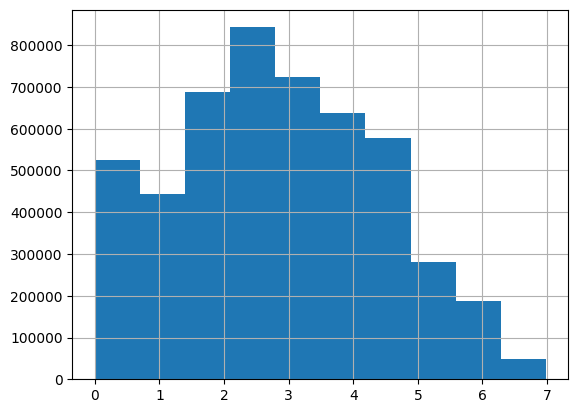

In [18]:
train_df["prop_location_score1"].hist()

In [19]:
train_df["prop_location_score2"]

0          0.0438
1          0.0149
2          0.0245
3          0.0125
4          0.1241
            ...  
4958342    0.0471
4958343    0.1520
4958344    0.0164
4958345    0.0662
4958346       NaN
Name: prop_location_score2, Length: 4958347, dtype: float32

In [20]:
for col in train_df.columns:
    length = len(train_df[train_df[col].isna()])
    if length>0:
        print(f"Column {col} has {length} na values")

Column visitor_hist_starrating has 4706481 na values
Column visitor_hist_adr_usd has 4705359 na values
Column prop_review_score has 7364 na values
Column prop_location_score2 has 1090348 na values
Column prop_log_historical_price has 713899 na values
Column srch_query_affinity_score has 4640941 na values


KeyboardInterrupt: 

In [ ]:
for col in train_df.columns:
    length = len(train_df[train_df[col] == np.inf])
    if length>0:
        print(f"Column {col} has {length} infinite values")

Column gross_bookings_usd has 3 infinite values
Column price_usd_mean_over_prop_id has 473 infinite values
Column price_usd_median_over_prop_id has 8 infinite values
Column price_usd_std_over_prop_id has 23110 infinite values


In [ ]:
train_df["srch_destination_id"].corr(train_df["visitor_location_country_id"])

0.00021922157018044184

In [ ]:
train_df[train_df["visitor_location_country_id"] == 0]

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,prop_starrating_std_over_prop_id,prop_review_score_mean_over_prop_id,prop_review_score_median_over_prop_id,prop_review_score_std_over_prop_id,prop_location_score1_mean_over_prop_id,prop_location_score1_median_over_prop_id,prop_location_score1_std_over_prop_id,prop_location_score2_mean_over_prop_id,prop_location_score2_median_over_prop_id,prop_location_score2_std_over_prop_id


In [ ]:
# Get the id's whose value count is lower than 1000
low_count_ids = train_df["srch_destination_id"].value_counts().loc[
    lambda x: x > 5000
].index
train_df[train_df["srch_destination_id"].isin(low_count_ids)]["srch_destination_id"].value_counts()

srch_destination_id
8192     69832
4562     57090
9402     40629
8347     33274
10979    33264
         ...  
23769     5214
4440      5214
3095      5084
8714      5006
18367     5005
Name: count, Length: 141, dtype: int64

In [ ]:
low_count_ids

Index([213,  42,  65, 145,  16,   6,  78,  37, 160, 221,
       ...
        54, 198,  58, 101,  66, 226, 190, 146,  83, 150],
      dtype='int16', name='visitor_location_country_id', length=133)

In [ ]:
train_df.groupby("site_id").value_counts()

NotImplementedError: float16 indexes are not supported

In [ ]:
data_preparer.load_and_preprocess_data("training_set_VU_DM.csv", "training_set_processed", upload=False)

/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/Users/rik/.pyenv/versions/3.10.12/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,prop_starrating_std_over_prop_id,prop_review_score_mean_over_prop_id,prop_review_score_median_over_prop_id,prop_review_score_std_over_prop_id,prop_location_score1_mean_over_prop_id,prop_location_score1_median_over_prop_id,prop_location_score1_std_over_prop_id,prop_location_score2_mean_over_prop_id,prop_location_score2_median_over_prop_id,prop_location_score2_std_over_prop_id
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,0.0,3.5,3.5,0.0,2.830078,2.830078,0.0,0.056183,0.043793,0.030014
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,0.0,4.0,4.0,0.0,2.199219,2.199219,0.0,0.025833,0.014900,0.031860
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,0.0,4.5,4.5,0.0,2.199219,2.199219,0.0,0.038940,0.024506,0.049286
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,0.0,4.0,4.0,0.0,2.830078,2.830078,0.0,0.022614,0.012497,0.019699
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,0.0,3.5,3.5,0.0,2.640625,2.640625,0.0,0.144043,0.124084,0.064758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,5,219,NaN,NaN,219,77700,3,4.0,1,...,0.0,4.0,4.0,0.0,1.610352,1.610352,0.0,0.045532,0.047089,0.011406
4958343,332785,5,219,NaN,NaN,219,88083,3,4.0,1,...,0.0,4.0,4.0,0.0,1.950195,1.950195,0.0,0.145264,0.151978,0.038788
4958344,332785,5,219,NaN,NaN,219,94508,3,3.5,1,...,0.0,3.5,3.5,0.0,1.099609,1.099609,0.0,0.025391,0.016403,0.026352
4958345,332785,5,219,NaN,NaN,219,128360,3,5.0,1,...,0.0,5.0,5.0,0.0,1.950195,1.950195,0.0,0.075134,0.066223,0.038727
